## supervised Machine Learning challenge 

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

### DATA 

In [2]:
df = pd.read_csv("Resources/lending_data.csv")
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [3]:
X = df.drop(columns=["loan_status"])
y = df["loan_status"]

In [4]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y)

### LOGISTIC REGRESSION

In [5]:
# Train a Logistic Regression model print the model score
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")


Training Data Score: 0.9922616591002889
Testing Data Score: 0.9914362360709864


In [6]:
y_true = y_test
y_pred = classifier.predict(X_test)
confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn)
precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
f1 = 2*precision*sensitivity / (precision + sensitivity)

print(f''' LOGISTIC REGRESSION STATS:
________________________________________
Accuracy: {accuracy}
precision: {precision}
sensitivity: {sensitivity}
f1: {f1}''')

print(classification_report(y_true, y_pred))


 LOGISTIC REGRESSION STATS:
________________________________________
Accuracy: 0.9914362360709864
precision: 0.8463855421686747
sensitivity: 0.8977635782747604
f1: 0.8713178294573644
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18758
           1       0.85      0.90      0.87       626

    accuracy                           0.99     19384
   macro avg       0.92      0.95      0.93     19384
weighted avg       0.99      0.99      0.99     19384



### RANDOM FOREST CLASSIFIER

In [7]:
# Train a Random Forest Classifier model and print the model score
clf = RandomForestClassifier(random_state=1).fit(X_train, y_train)
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')


Training Score: 0.9973517677809878
Testing Score: 0.9907655798596781


In [8]:
y_true = y_test
y_pred = clf.predict(X_test)
confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn)
precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
f1 = 2*precision*sensitivity / (precision + sensitivity)

print(f'''RANDOM FOREST CLASSIFIER STATS:
________________________________________
Accuracy: {accuracy}
precision: {precision}
sensitivity: {sensitivity}
f1: {f1}''')

print(classification_report(y_true, y_pred))

RANDOM FOREST CLASSIFIER STATS:
________________________________________
Accuracy: 0.9907655798596781
precision: 0.8519685039370078
sensitivity: 0.8642172523961661
f1: 0.8580491673275179
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18758
           1       0.85      0.86      0.86       626

    accuracy                           0.99     19384
   macro avg       0.92      0.93      0.93     19384
weighted avg       0.99      0.99      0.99     19384



### ROC CURVE

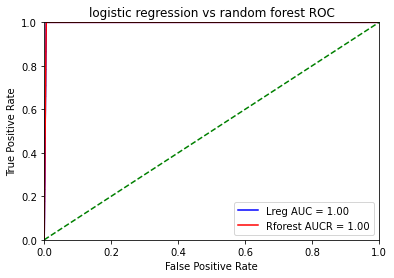

In [10]:
probsl = classifier.predict_proba(X_test)
predsl = probsl[:,1]
fprl, tprl, thresholdl = metrics.roc_curve(y_test, predsl)
roc_aucl = metrics.auc(fprl, tprl)

probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('logistic regression vs random forest ROC')
plt.plot(fprl, tprl, 'b', label = 'Lreg AUC = %0.2f' % roc_aucl)
plt.plot(fpr, tpr, 'r', label = 'Rforest AUCR = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


## ANALYSIS:
#### According to the ROC curve plot, boith models are equaly useful, but according to the confusion matrix, the linear regression model is better at  finding all positive instances (recall) making it the best model for this challenge